<center><h2> CPE 4040 Spring 2023: Midterm Exam 2</h2></center>

### This is a two-part exam:
 * Part 1: Problem solving
 * Part 2: Semi-guided project for exploratory data analysis

### General guidelines:
 * Do your coding in a clean and logical manner.
 * __Make comments on your codes. Make insightful observations after the analysis.__
 * This is an individual assignment.
 * __No plagiarism__: you are encouraged to do reseach, however, do your own work. Do not copy-and-paste AI's or other people's work.    

### Submission:
 * You have to submit this notebook file and the pdf file - remember to add your name in in the filenames. 
 * Deadline: 11:59 pm, 4/6 (Thursday)

<h3> Import Python Tool Modules First</h3>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Part 1: Baby Name Dataset Analysis (40 Points)</h3>

In this dataset, baby names in the US from 2004 to 2014 are tablulated by gender, year, State, and number of counts.

#### First step: import the dataset (in csv format) from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv). 

<h4>Q1. Read the dataset and assign it to a dataframe called "baby". Display the first 10 rows of the dataset. What are the column labels?</h4>

In [3]:
baby = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [4]:
baby.head(10) #Displays the first 10 rows.

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


<h4>Q2. The first two columns "Unnamed: 0" and "Id" are not useful. Please remove them and display the first 5 rows of the new dataframe.</h4> 

In [5]:
baby = baby.drop(columns=["Unnamed: 0", "Id"]) #Removes the Unnamed and ID columns.

In [6]:
baby.head() #displays first 5 rows.

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


<h4>Q3. According to this dataset, how many babies were born each year from 2004 to 2014? Show the results and plot a vertical bar chart for the number of new-borns from 2004 to 2014. Properly label the x-axis and the y-axis.</h4>

In [7]:
#Will group the names by year and sum up the count for each year.
numberOfBirths = baby.groupby('Year')['Count'].sum()
numberOfBirths

Year
2004    3293984
2005    3305315
2006    3387737
2007    3412417
2008    3340318
2009    3232116
2010    3116548
2011    3079145
2012    3073858
2013    3066443
2014    3113611
Name: Count, dtype: int64

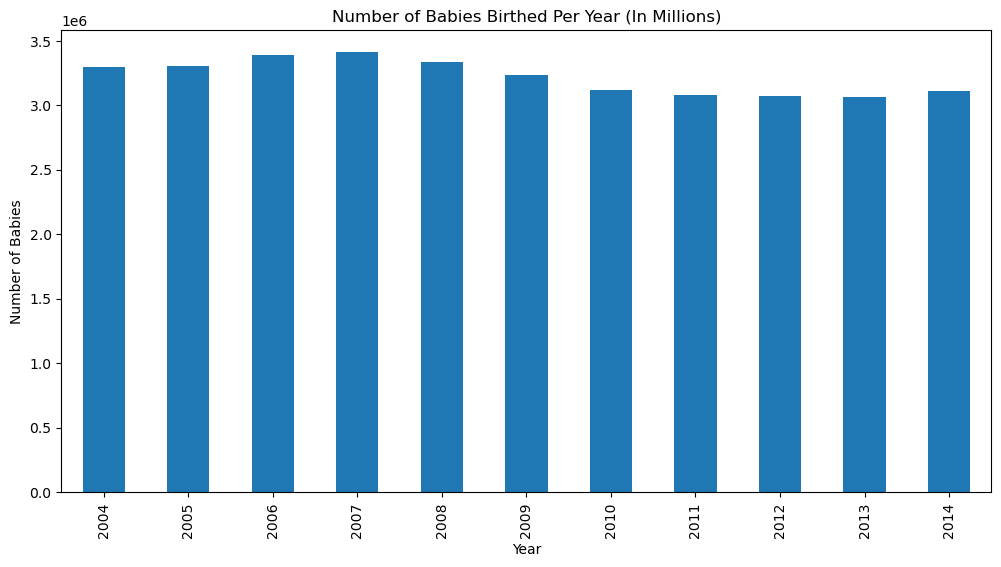

In [8]:
#This creates a bar chart made from the groupby function.
numberOfBirths.plot(kind='bar', figsize=(12,6))
plt.title("Number of Babies Birthed Per Year (In Millions)")
plt.ylabel('Number of Babies')
plt.show()

<h4>Q4. How many boys (M) and girls (F) were born each year from 2004 to 2014? Show the results and plot a grouped bar chart, one for boys and one for girls. Please add a legend. </h4>

In [9]:
#Groups each gender by year and sums up the count
genderBirths = baby.groupby(['Year', 'Gender'])['Count'].sum()
genderBirths

Year  Gender
2004  F         1523496
      M         1770488
2005  F         1528165
      M         1777150
2006  F         1564886
      M         1822851
2007  F         1576648
      M         1835769
2008  F         1544411
      M         1795907
2009  F         1493172
      M         1738944
2010  F         1439346
      M         1677202
2011  F         1422539
      M         1656606
2012  F         1422020
      M         1651838
2013  F         1419351
      M         1647092
2014  F         1446259
      M         1667352
Name: Count, dtype: int64

In [10]:
#Creates the grouped bar chart after converting the group by into a dataframe
dfGenderBirths = pd.DataFrame(genderBirths)

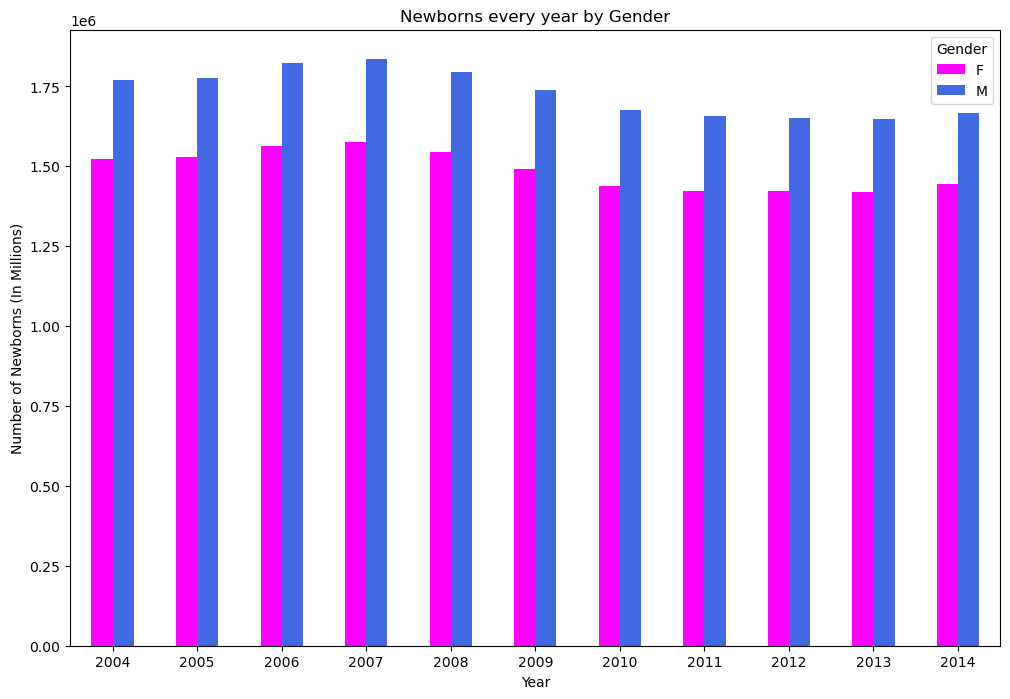

In [11]:
groupGenders= dfGenderBirths.groupby(['Year', 'Gender'])['Count'].sum().unstack()
groupGenders.plot(kind='bar',rot=0, color = ['magenta','royalblue'], figsize=(12,8), stacked=False)
plt.ylabel("Number of Newborns (In Millions)")
plt.title("Newborns every year by Gender")
plt.show()

<h4>Q5. Are there more unique male names or female names in the dataset?</h4>

In [12]:
#With the use of the nunique function, we can seperate the names to get every unique name out of the dataset
#and count how many of each are.
maleNames = baby[baby['Gender'] == 'M']['Name'].nunique()
femaleNames = baby[baby['Gender'] == 'F']['Name'].nunique()

print("There are", maleNames, "male names.")
print("There are", femaleNames, "female names.\n")

#Will compare the numbers and will output the answer depending on the numbers given.
if maleNames > femaleNames:
    print("There are more unique male names than female names.")
else:
    print("There are more unique female names than male names.")

There are 8012 male names.
There are 10929 female names.

There are more unique female names than male names.


<h4>Q6. What is the most popular boy's name from 2004 to 2014? What is the most popular girl's name from 2004 to 2014?</h4>

In [13]:
#Due to group by indexing by name, we have to reset the index to index by 0,1,2,3 using reset_index()
#Will sort the values by count and will descend
babyNameCount = baby.groupby(['Name', 'Gender'])['Count'].sum().reset_index()
babyNameCountSorted = babyNameCount.sort_values('Count', ascending=False)

#With the use of index location, we can get the top of the list of both male and female names
popularMaleName = babyNameCountSorted[babyNameCountSorted['Gender'] =='M'].iloc[0]['Name']
popularFemaleName = babyNameCountSorted[babyNameCountSorted['Gender'] =='F'].iloc[0]['Name']

#Will print the names at the top of each list.
print(popularMaleName,"is the most popular boy's name.")
print(popularFemaleName,"is the most popular girl's name.")

Jacob is the most popular boy's name.
Emma is the most popular girl's name.


<h4>Q7. For the State of Georgia, what was the most popular boy's name in 2008? How about girl's name?</h4>

In [14]:
#Filters the data set to the state of Georgia and in the year 2008
babiesInGeorgia = baby[(baby['State'] == 'GA') & (baby['Year'] == 2008)].reset_index()
babiesInGeorgiaSorted = babiesInGeorgia.sort_values('Count', ascending=False)

#Just like the last question, after reseting the index, we can get the popular names after sorting the data
popGeorgiaMaleName = babiesInGeorgiaSorted[babiesInGeorgiaSorted['Gender'] == 'M'].iloc[0]['Name']
popGeorgiaFemaleName = babiesInGeorgiaSorted[babiesInGeorgiaSorted['Gender'] == 'F'].iloc[0]['Name']

#Prints the popular male and female names in Georgia.
print(popGeorgiaMaleName, "is the most popular boy's name in Georgia.")
print(popGeorgiaFemaleName, "is the most popular girl's name in Georgia.")

William is the most popular boy's name in Georgia.
Madison is the most popular girl's name in Georgia.


<h4>Q8. Let's see how popular your name is in the US. </h4>

<h4>How many babies in this dataset have the same first name as you? </h4>

In [15]:
#Will add up all babies with the name Clarence.
sameNameBabies = baby[baby['Name'] == 'Clarence']['Count'].sum()

print("There are", sameNameBabies, "babies that have the name Clarence.")

There are 1859 babies that have the name Clarence.


<h4>Q9. What are the top five states that had the most increase in newborns between 2004 and 2014? </h4>
<h4>How about the bottom five states with the lowest increase during the same period?</h4>

In [16]:
#Groups the babies per yea and adds the count, then resets the index so we can look through the data
amountBabiesPerState = baby.groupby(['State', 'Year'])['Count'].sum().reset_index()

babyRatePerState= amountBabiesPerState[(amountBabiesPerState['Year'] >= 2004) & (amountBabiesPerState['Year'] <= 2014)].groupby('State')['Count'].sum()

#Will sort by Highest to lowest then print the top 5 highest
babyRatePerStateSortedHighest = babyRatePerState.sort_values(ascending=False)
top5States = babyRatePerStateSortedHighest.head()
print("The top 5 states are:\n", top5States, "\n")

#Will sort by Lowest to Highest then print the bottom 5 lowest
babyRatePerStateSortedLowest = babyRatePerState.sort_values(ascending=True)
bottom5States = babyRatePerStateSortedLowest.head()
print("The bottom 5 states are:\n", bottom5States)

The top 5 states are:
 State
CA    5084647
TX    3791675
NY    2208154
FL    1976379
IL    1486991
Name: Count, dtype: int64 

The bottom 5 states are:
 State
WY    36019
VT    36432
AK    63649
ND    69561
DE    73060
Name: Count, dtype: int64


<h4>Q10. Create a chart showing the annual number of newborns in the top 5 states with the highest increase between 2004 and 2014. </h4>
<h4>The x-axis should represent the years, and the y-axis should represent the number of newborns per year.</h4>

Text(0.5, 1.0, 'Number of Newborns Per Year from 2004-2014')

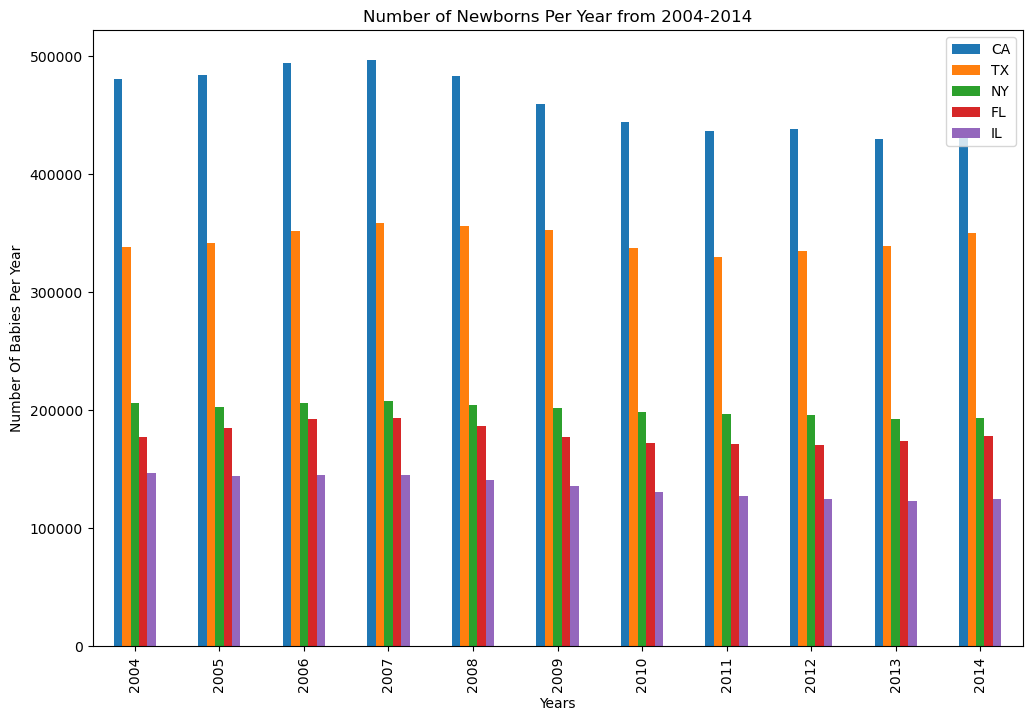

In [17]:
#Separates all the data for the top 5 states via manual extracton
babiesCA = amountBabiesPerState[amountBabiesPerState['State'] == "CA"].groupby('Year')['Count'].sum()
babiesTX = amountBabiesPerState[amountBabiesPerState['State'] == "TX"].groupby('Year')['Count'].sum()
babiesNY = amountBabiesPerState[amountBabiesPerState['State'] == "NY"].groupby('Year')['Count'].sum()
babiesFL = amountBabiesPerState[amountBabiesPerState['State'] == "FL"].groupby('Year')['Count'].sum()
babiesIL = amountBabiesPerState[amountBabiesPerState['State'] == "IL"].groupby('Year')['Count'].sum()

#Using pd.concat() we can combine the data into one dataframe in which we can use the data as a whole
top5Babies = pd.concat([babiesCA, babiesTX, babiesNY, babiesFL, babiesIL], axis=1)
top5Babies.columns = ['CA', 'TX', 'NY', 'FL', 'IL']

#Plots the data in a grouped bar chart
top5Babies.plot(kind='bar', figsize=(12,8))
plt.xlabel('Years')
plt.ylabel('Number Of Babies Per Year')
plt.title("Number of Newborns Per Year from 2004-2014")

## Part 2: The PIMA Diabetic Data Set (60 Points)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It consists of several diagnostic measurements from female patients at least 21 years old of Pima Indian heritage. It also shows the diagnosis on whether the patients have diabetes mellitus disease.

### The filename of the dataset is "diabetes.csv" that comes with this assignment.

The dataset contains the following features/columns:

 * __Pregnancies__: Number of times pregnant
 * __Glucose__: Plasma glucose concentration at 2 hour in an oral glucose tolerance test (mg/dL)
 * __BloodPressure__: Diastolic blood pressure (mm Hg)
 * __SkinThickness__: Triceps skin fold thickness (mm)
 * __Insulin__: 2-hour serum insulin level (mu U/ml)
 * __BMI__: Body mass index (weight in kg/(height in m)^2)
 * __DiabetesPedigreeFunction__: a function which scores likelihood of diabetes based on family history
 * __Age__: age of patients (years)
 * __Outcome__: class variable 0 or 1 indicating disease (0: non-diabetic, 1: diabetic)


## Part 2.1: Data Preparation and Cleaning (15 points)

Some typical tasks in this part include:
 1. Load the dataset in a data frame
 2. Examine the dataset attributes: index, columns, range of values etc.
 3. Handle missing and invalid data
 4. Identify and remove outliers

### Examine the dataset¶
**Q1: Load the dataset in a data frame and show the dataset attributes: index, columns, range of values etc.**

In [18]:
PIMA = pd.read_csv(r'C:\Users\c3myb\OneDrive\Documents\Juypter Notebook HW Files\CPE 4040\Midterm 2\diabetes.csv')

PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
PIMA.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Handling missing data:
   **Q2: Are there missing values in the data set? Write a code to find out.**
   
   **Q3: You may notice some of the columns have unreasonable zero values (for example, Glucose and BMI). Identify those columns and replace the zeros with the median value of that column.**

### Missing value analysis

In [21]:
#Question 2
#Will check if NaN is present in the file
missingCheck = PIMA.isnull().sum()
print(missingCheck)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
#Question 3
#Replaces the unreasonable zeroes with the median

#Replaces the zeroes in Glucose with the median
gluMedian = PIMA['Glucose'].median()
PIMA['Glucose'] = PIMA['Glucose'].replace(0, gluMedian)

#Replaces the zeroes in Insulin with the median
insulinMedian = PIMA['Insulin'].median()
PIMA['Insulin'] = PIMA['Insulin'].replace(0, insulinMedian)

#Replaces the zeroes in SkinThickness with the median
#Imagine having no skin lol
skinMedian = PIMA['SkinThickness'].median()
PIMA['SkinThickness'] = PIMA['SkinThickness'].replace(0, skinMedian)

#Replaces the zeroes in BloodPressure with the median
pressureMedian = PIMA['BloodPressure'].median()
PIMA['BloodPressure'] = PIMA['BloodPressure'].replace(0, pressureMedian)

#Replaces the zeroes in BMI with the median
bmiMedian = PIMA['BMI'].median()
PIMA['BMI'] = PIMA['BMI'].replace(0, bmiMedian)

PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


### Handling Outliers:
**Q4: Use boxplot to identify outliers for BMI data. Replace the outliers with the median BMI value** 

<AxesSubplot:ylabel='BMI'>

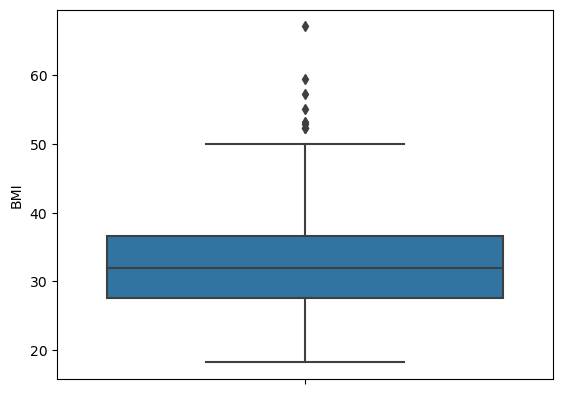

In [23]:
#Before Cleaning Outliers
sns.boxplot(y=PIMA['BMI'])

<AxesSubplot:ylabel='BMI'>

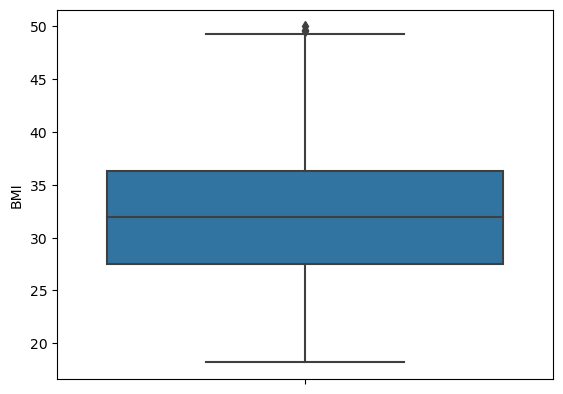

In [24]:
#After cleaning. The cut off for BMI before outliers is 52.
PIMA[PIMA['BMI'] > 52] = bmiMedian
sns.boxplot(y=PIMA['BMI'])

## Part 2.2: Exploratory Data Analysis and Visualization (20 points)

You are expected to perform some basic __univariate__ and __bivariate__ data analysis and create **3 different charts**:
 * Chart 1: Create histograms for Glucose, BMI, and Age.
 * Chart 2: Correlation matrix heatmap.
 * Chart 3: Create your own chart (univariate or bivariate analysis).

Please make comments on the insights from the exploratory analysis.

### Chart 1 - Histograms
Create histograms for Glucose, BMI, and Age

Text(0, 0.5, 'Frequency')

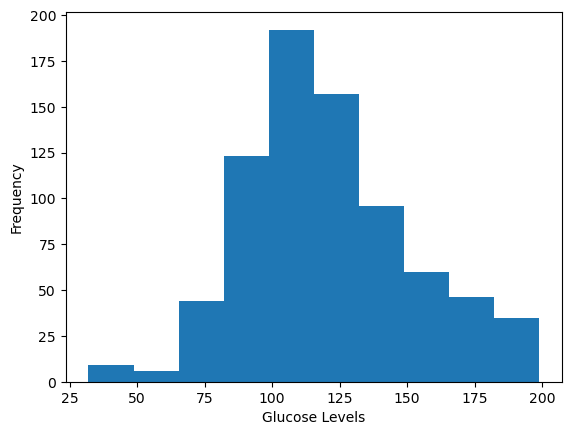

In [25]:
#Chart for Glucose
PIMA['Glucose'].plot(kind='hist')
plt.xlabel('Glucose Levels')
plt.ylabel ('Frequency')

Text(0, 0.5, 'Frequency')

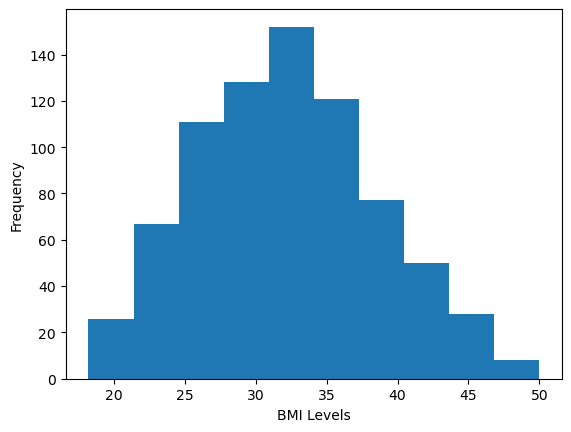

In [26]:
#Chart for BMI
PIMA['BMI'].plot(kind='hist')
plt.xlabel('BMI Levels')
plt.ylabel ('Frequency')

Text(0, 0.5, 'Frequency')

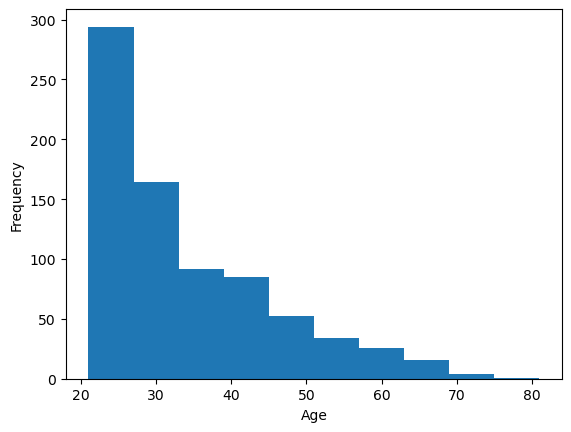

In [27]:
#Chart for Age
PIMA['Age'].plot(kind='hist')
plt.xlabel('Age')
plt.ylabel ('Frequency')

### Comment:

### Given the histogram charts, it shows that women in their 20s and 30s have normal levels of glucose and BMI. The reason is that considering they show the most on the Age histogram and the corresponding BMI and Glucose histograms, they are around the middle, which shows the normal amount of glucose.

### Chart 2 - Correlation Matrix Heatmap
- Calcuate the correlation matrix of the dataframe and plot the heatmap.
- Question: what are the three factors that have the highest correlation to the outcome? 

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

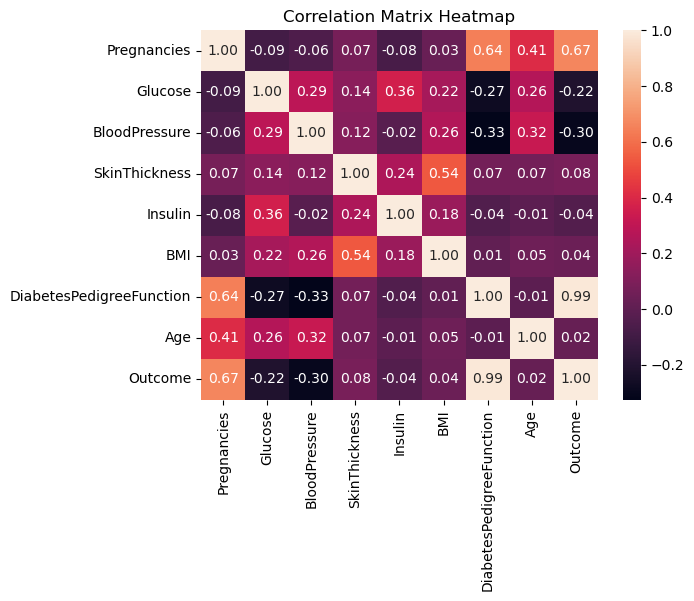

In [28]:
#Correlation is found first
PIMAcorrelation = PIMA.corr()
sns.heatmap(PIMAcorrelation, annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')

### Comment:

### Pregnancies, DiabetesPedigreeFunction, Age seem to be the three factors to influce of the women having diabetes or not. The reason for this is that around the areas where the three are next to each other, the color gets brighter showing a higher chance of influencing the outcome.

### Chart 3 - Create your own chart

Text(0.5, 1.0, 'Outcome of Females Having Diabetes Under 60')

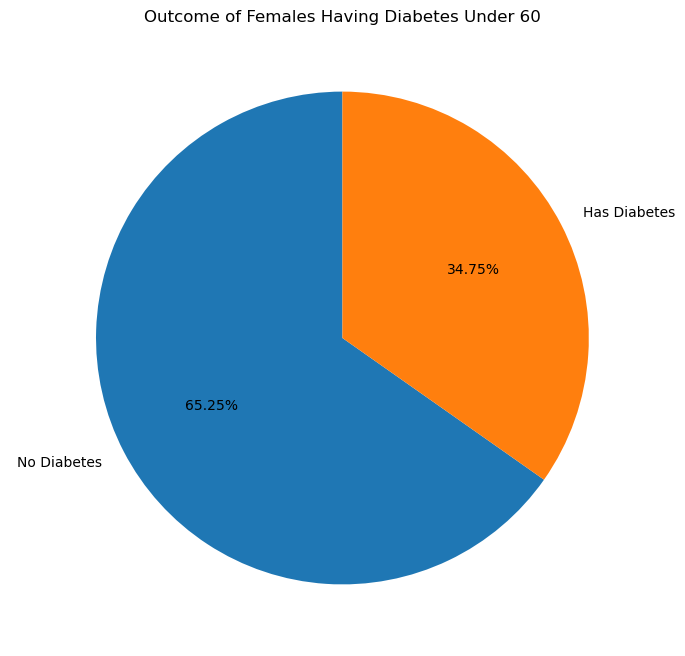

In [29]:
under60 = PIMA[PIMA ['Age'] < 60]['Outcome'].value_counts()
under60.drop(labels=[32]).plot(kind='pie', figsize=(12,8), autopct='%.2f%%', labels=('No Diabetes', 'Has Diabetes'),
             startangle=90)

plt.ylabel(' ')
plt.title('Outcome of Females Having Diabetes Under 60')

### Comment:

### Given that 34.75% of Women in India under 60 are diagnosed having diabetes, this pie chart shows that the issue can happen in earlier ages is a common occurance due to some given reason.

## Part 2.3: In-Depth Analysis (25 points)

In this section, you will write codes to answer __three__ questions about the dataset. The first two are given and you need to come up with your own question for the third one. For example, you may analyze how individual feature (column data) impacts the outcome of the diagnosis.

### Q1. Do older women have higher chances of getting diabetes?  
#### You may need to create a bar chart with women in different age groups and show the percentage and/or total number of diabetic vs. non-diabetic in each group.

Text(0.5, 1.0, 'Outcome of Diabetes Of Females Per Age Group')

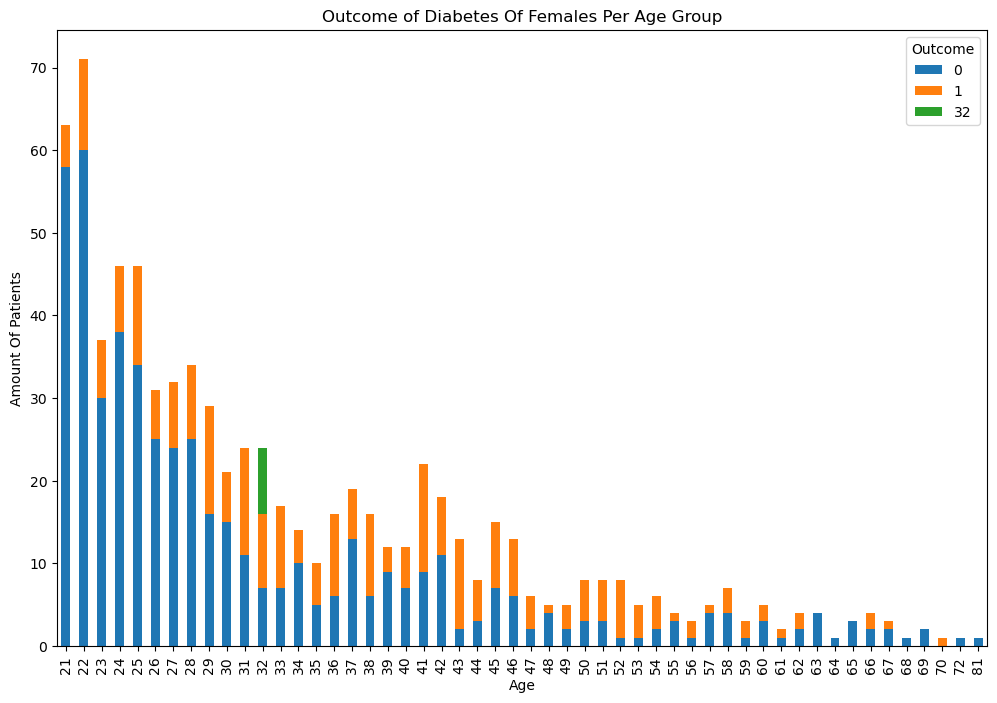

In [30]:
#Grous the women by age and counts the outcomes individually. After unstacking, we can put it on a stacked bar chart.
#The stacked bar chart can help us see the total amount in the age group, giving us a ratio of not having diabetes to 
#having diabetes.
ageOfWomen = PIMA.groupby('Age')['Outcome'].value_counts().unstack()
ageOfWomen.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.ylabel('Amount Of Patients')
plt.title('Outcome of Diabetes Of Females Per Age Group')

### Analysis:

### After looking at the data and ignoring the green bar (could not find how to remove that unfortunately), we can see that the in the range of 21 - 39 have normal amount of people with a ratio of people not getting diabetes and having diabetes. The only intersting part between that age group is age 32 having more women that contract diabetes 

### The further we go down the bar graph with the ages, the ratio of each group begins to have a turn with more cases of diabetes being found. The reason this is interesting that, especially around 50 - 54, it seems like a huge spike has occured. Of course, this can be a case of not having a lot people in those age groups, as we can see in older ages. However, it does not change the fact that the amount of people having diabetes can correlate to age as well due to old age and deterration of the body as we get older.

### 2. Based on BMI data, how many of this group of patients are considered underweight, normal, overweight, obese (class I, II, and III)? 

  - underwieght: 0 < BMI < 18.5
  - normal: 18.5 =< BMI < <25
  - overweight: 25 =< BMI <30
  - class I: 30 =< BMI < 35
  - class II: 35 =< BMI <40
  - class III: BMI >= 40

In [31]:
#Pulls the BMI using boolean arrays and counting how many patients are within those ranges using value_counts().
underweight = PIMA[(PIMA['BMI'] > 0) & (PIMA['BMI'] < 18.5)].value_counts()
normal = PIMA[(PIMA['BMI'] >= 18.5) & (PIMA['BMI'] < 25)].value_counts()
overweight = PIMA[(PIMA['BMI'] >= 25) & (PIMA['BMI'] < 30)].value_counts()
firstClass = PIMA[(PIMA['BMI'] >= 30) & (PIMA['BMI'] < 35)].value_counts()
secondClass = PIMA[(PIMA['BMI'] >=35) & (PIMA['BMI'] < 40)].value_counts()
thirdClass = PIMA[PIMA['BMI'] >=40].value_counts()

#Gets the length of each to represent the patients.
amountUnder = len(underweight)
amountNormal = len(normal)
amountOver = len(overweight)
amountC1 = len(firstClass)
amountC2 = len(secondClass)
amountC3 = len(thirdClass)

print("There are", amountUnder, "underweight patients.")
print("There are", amountNormal, "normal weight patients.")
print("There are", amountOver, "overweight patients.")
print("There are", amountC1, "Class I patients.")
print("There are", amountC2, "Class II patients.")
print("There are", amountC3, "Class III patients.")

There are 4 underweight patients.
There are 102 normal weight patients.
There are 179 overweight patients.
There are 236 Class I patients.
There are 150 Class II patients.
There are 90 Class III patients.


### Analysis:

### Given the amount of women that are in Class I for the BMI, it shows that a lot of women with in the dataset are dangerously overweight as well. Considering the last question regarding the ratio between women having diabetes or not between each age, this can coincide with the idea that some of those women have a high BMI as well. As we already know for a fact that having a high BMI can cause health issues as well too. 

### However, the staggering amount of Class III patients do show that they might fall into those inital spikes that we have seen that caused the ratio of diabetes diagnoises to topple towards having diabetes around ages 40-54. Also, we can infer, from the information extracted, that the normal weight to overweight patients can fall around that early age range as well given the high amount of numbers in those areas as well, which majority do not have diabetes.

### 3. Your own question here.

### In the age range of 40-50, what is the average glucose for each individual age within each group? Plot the results in a bar graph.

Text(0.5, 1.0, 'Average Glucose From 40 to 50')

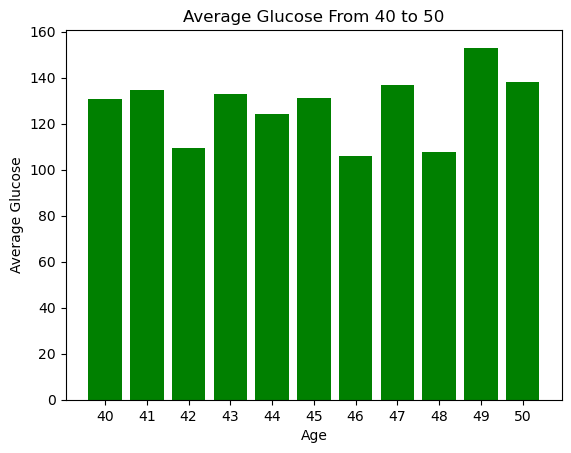

In [32]:
#Will get the average Gluclose of each age between 40 and 50
age40Glu = PIMA[PIMA['Age'] == 40]['Glucose'].mean()
age41Glu = PIMA[PIMA['Age'] == 41]['Glucose'].mean()
age42Glu = PIMA[PIMA['Age'] == 42]['Glucose'].mean()
age43Glu = PIMA[PIMA['Age'] == 43]['Glucose'].mean()
age44Glu = PIMA[PIMA['Age'] == 44]['Glucose'].mean()
age45Glu = PIMA[PIMA['Age'] == 45]['Glucose'].mean()
age46Glu = PIMA[PIMA['Age'] == 46]['Glucose'].mean()
age47Glu = PIMA[PIMA['Age'] == 47]['Glucose'].mean()
age48Glu = PIMA[PIMA['Age'] == 48]['Glucose'].mean()
age49Glu = PIMA[PIMA['Age'] == 49]['Glucose'].mean()
age50Glu = PIMA[PIMA['Age'] == 50]['Glucose'].mean()

#Will plot the bar graph of the average glucose for each age between 40 and 50.
ticks = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49 ,50]
glucose40to50 = [age40Glu,age41Glu, age42Glu, age43Glu, age44Glu, age45Glu, age46Glu, 
                 age47Glu, age48Glu, age49Glu, age50Glu]


plt.bar(ticks, glucose40to50, color="Green")
plt.xticks(ticks)
plt.xlabel('Age')
plt.ylabel('Average Glucose')
plt.title('Average Glucose From 40 to 50')

### Analysis:

### Atfer analyzing the BMI information and the age groups for having diabetes or not, we can hone in on the Glucose levels to see which age group spiked in glucose to cause those changes. As we can see here, at age 49, the glucose spiked up to around 150 from age 48 where it was around 115 Glucose Levels. This can also help justify the ratio at age 49 with the stacked bar graph showing that high sugar levels around that area along with the high BMI around Class I can confirm the sudden flip of the ratio of diabetes can be influnced by those two factors.

<center><h3>Submit both the Jupyter file and the PDF file.</h3></center>